# Studying Gradient Descent and Plotting

### Notebook Imports and Package

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #that is colormap


%matplotlib inline

## Example 1

## $$f(x) = x^2 + x + 1$$

In [3]:
def f(x):
    return x**2 + x + 1

In [4]:
#Make data
x_1 = np.linspace(start=-3, stop=3, num=500)


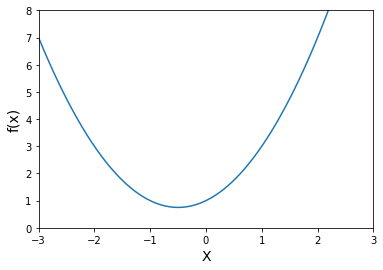

In [5]:
#Plot
plt.plot(x_1, f(x_1))
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.show()

In [6]:
def df(x):
    return 2*x + 1

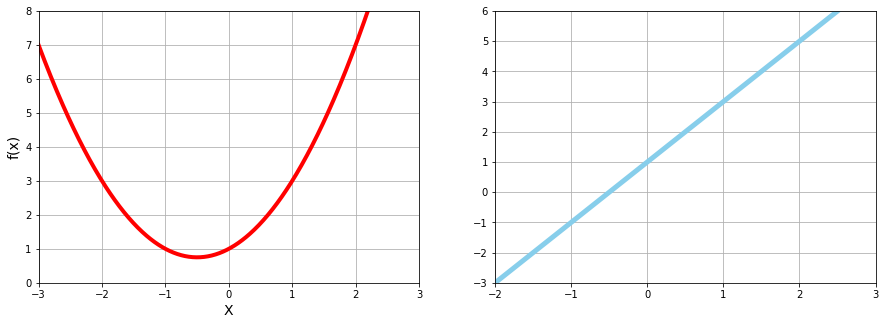

In [7]:
#Plot and derivative side by side

plt.figure(figsize=(15,5))

#first plot
plt.subplot(1,2,1)

plt.plot(x_1, f(x_1), color='red', linewidth= 4)
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.grid()
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)

#second plot
plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.plot(x_1, df(x_1), color= 'skyblue', linewidth = 5)

plt.show()

# Gradient Descent

In [8]:

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list= [new_x]
df_list = [df(new_x)]


for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - gradient * step_multiplier

    x_list.append(new_x)
    df_list.append(df(new_x))
    step_size = abs(new_x - previous_x)

    if step_size < precision:
        print('loop:', n)
        break
print('Local minimun occurs at:', new_x)
print('Slope or df(x):', df(new_x))
print('f(x) value or cost at this point:', f(new_x))
print(step_size)

loop: 50
Local minimun occurs at: -0.49996003706460423
Slope or df(x): 7.992587079153068e-05
f(x) value or cost at this point: 0.7500000015970362
9.990733848941336e-06


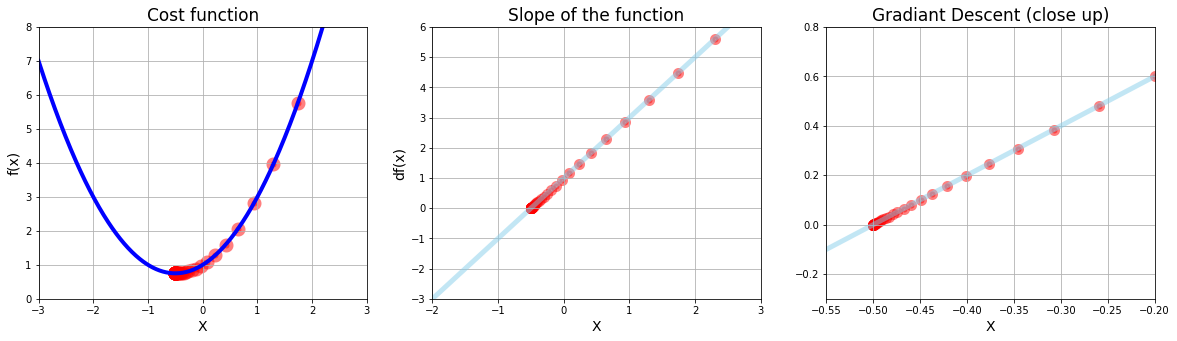

In [9]:
#Superimpose the gradient descent calculations on plot
plt.figure(figsize=(20,5))

#first plot

plt.subplot(1,3,1)
plt.title('Cost function', fontsize= 17)
plt.plot(x_1, f(x_1), color='blue', linewidth= 4)
plt.xlim(-3,3)
plt.ylim(0, 8)
plt.grid()
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)

values= np.array(x_list)
plt.scatter(x_list, f(values), color='red', alpha = 0.5, linewidth = 8)

#second plot
plt.subplot(1,3,2)
plt.title('Slope of the function', fontsize= 17)
plt.ylabel('df(x)', fontsize = 14)
plt.xlabel('X', fontsize = 14)

plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.plot(x_1, df(x_1), color= 'skyblue', alpha=0.5, linewidth = 5)
plt.scatter(x_list, df_list, color='red', alpha =  0.5, linewidth = 5)


#third plot
plt.subplot(1,3,3)
plt.title('Gradiant Descent (close up)', fontsize= 17)
plt.xlabel('X', fontsize = 14)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.grid()
plt.plot(x_1, df(x_1), color= 'skyblue', alpha=0.5, linewidth = 5)
plt.scatter(x_list, df_list, color='red', alpha =  0.5, linewidth = 5)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$ g(x) = x^4 - 4x^2 + 5 $$

In [10]:
#Making some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*(x**2) + 5

def dg(x):
    return 4*(x**3) - 8*x



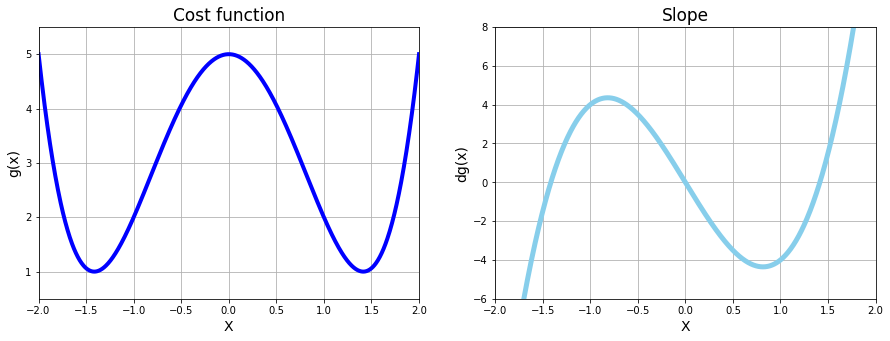

In [11]:
#Plot and derivative side by side

plt.figure(figsize=(15,5))

#first plot
plt.subplot(1,2,1)
plt.title('Cost function', fontsize = 17)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.plot(x_2, g(x_2), color='blue', linewidth= 4)
plt.grid()
plt.xlabel('X', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)

#second plot
plt.subplot(1,2,2)
plt.title('Slope', fontsize = 17)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dg(x)', fontsize = 14)
plt.grid()
plt.plot(x_2, dg(x_2), color= 'skyblue', linewidth = 5)

plt.show()

# Gradient Function as python function

In [2]:
def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001, max_iter=300):
    new_x = initial_guess

    x_list= [new_x]
    slope_list = [derivative_func(new_x)]
    


    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - gradient * multiplier

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        step_size = abs(new_x - previous_x)

        if step_size < precision:
            break
    
    return new_x, x_list, slope_list

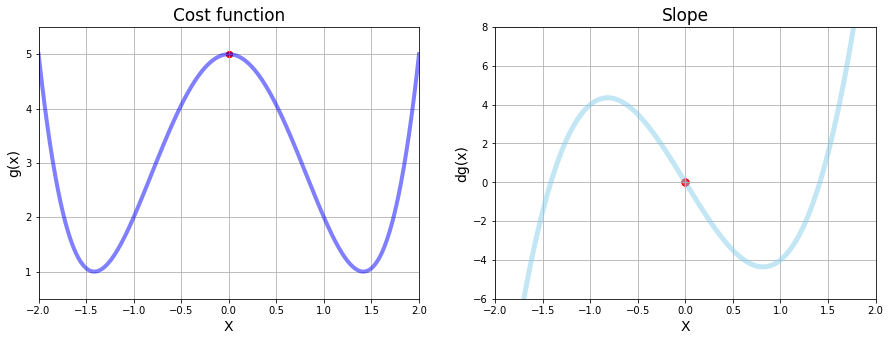

In [13]:
#Calling the gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess=0)
#Plot and derivative side by side


plt.figure(figsize=(15,5))

#first plot
plt.subplot(1,2,1)
plt.title('Cost function', fontsize = 17)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.plot(x_2, g(x_2), color='blue', linewidth= 4, alpha=0.5)
plt.grid()
plt.xlabel('X', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)
plt.scatter(list_x, g(np.array(list_x)), color='red')

#second plot
plt.subplot(1,2,2)
plt.title('Slope', fontsize = 17)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dg(x)', fontsize = 14)
plt.grid()
plt.plot(x_2, dg(x_2), color= 'skyblue', linewidth = 5, alpha=0.5)
plt.scatter(list_x, deriv_list, color='red', s=50)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples
## $$ℎ(𝑥)=𝑥^5−2𝑥^4+2$$

In [14]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

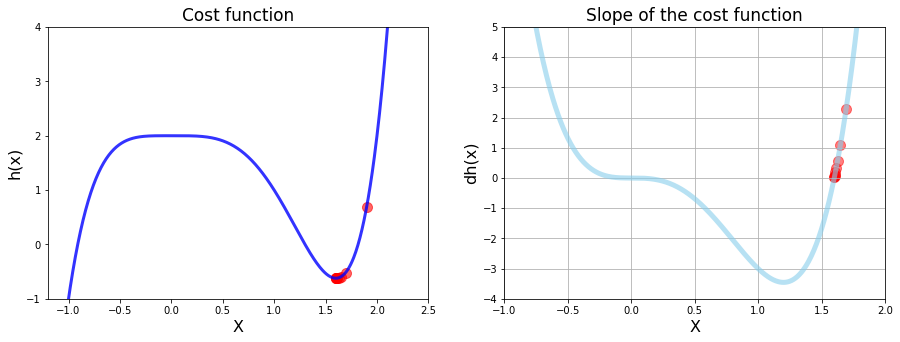

Local min occurs at:  1.6010440237355241
Cost at this minimum is:  -0.6214288239747052
Number of steps:  10


In [21]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= 1.9, 
                                                max_iter=71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

# The learning Rate

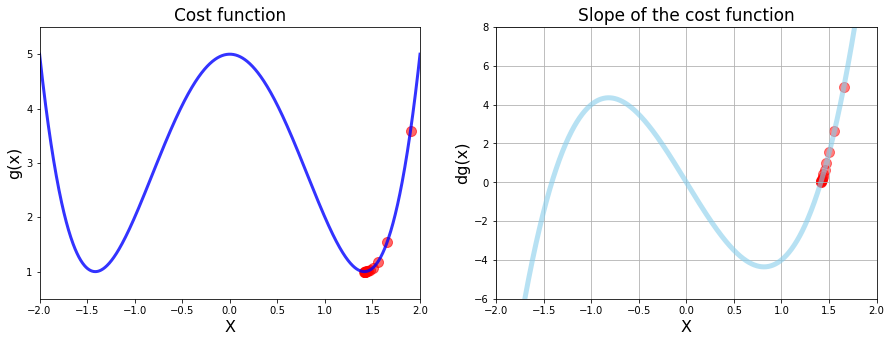

Number of steps is:  14


In [22]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

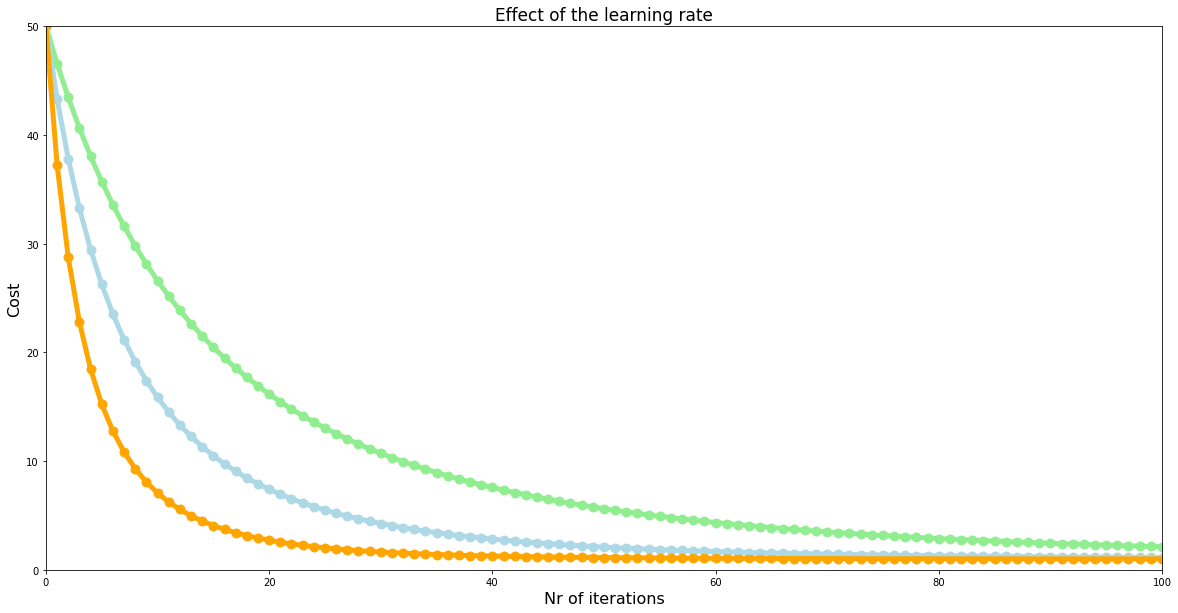

In [17]:
# Calling gradient descent function
n=100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Plot reduction cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

#Values for our charts
# 1) Y axis data: convert he lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

#Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

#Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='lightblue', linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='lightblue', s=80)

#Plotting high learning rate
plt.plot(iteration_list, g(high_values), color='orange', linewidth=5)
plt.scatter(iteration_list, g(high_values), color='orange', s=80)

plt.show()

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} +1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [18]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [19]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4,y_4)

print("Shape after meshgrid", x_4.shape)


Shape of X array (200,)
Shape after meshgrid (200, 200)


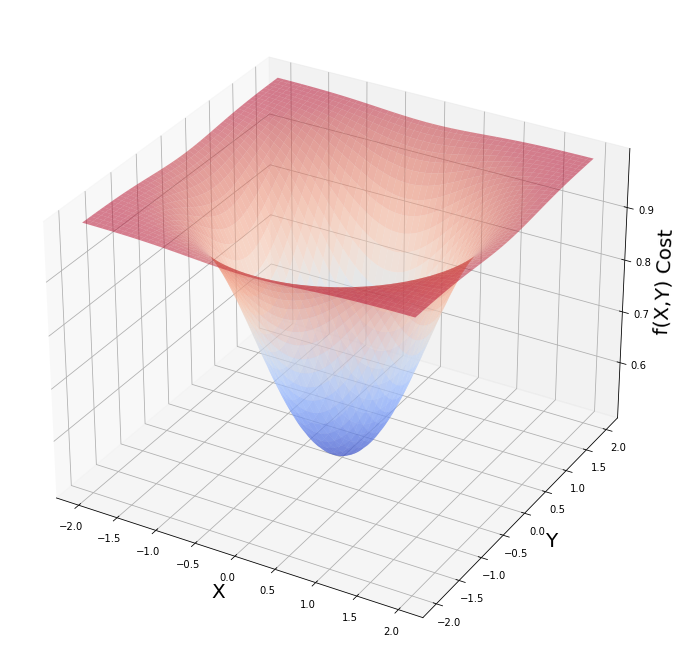

In [20]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection="3d")


ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(X,Y) Cost", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.5)

plt.show()

## Partial Derivative and Symbolic Computation